### Student-Exam-Data-Analysis

#### Phase 1: Data Overview

we will analyze Students Performance in Exam Dataset.
We have 8 columns and 1000 rows in this dataset. Columns are given below.

- gender
- race/ethnicity
- parental level of education
- lunch
- test preparation course
- math score
- reading score
- writing score

#### Phase 2: Data Analysis and Cleaning

We will import the Numpy and Pandas libraries to analyze the data. 
We will also import matplotlib and seaborn to visualize the data.

In [58]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

import os

print(os.listdir("dataset"))

['StudentsPerformance.csv']


In [59]:
# Reading Dataset

data = pd.read_csv("dataset/StudentsPerformance.csv")

In [60]:
# Information about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [61]:
# Let's take a look of first and last 5 rows of our dataset

data.head()

data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [62]:
# column names

data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [63]:
# Looking for summation of missing values in the data and cleaning them if there are some missing values.

data.isnull().sum()

# Inplace for saving to the data after dropped.

data.dropna(inplace=True, axis=0)

In [64]:
# Size of the data

data.shape

(1000, 8)

In [65]:
# Information about data. Like min, max, mean etc...

data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [66]:
# To look direct proportion or inverse proportion between columns

data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


##### Concatenating a Data
- We separate the data to 3 datas, with random rows in it. After that we concatenate these 3 datas. We can use this method to understand the data easily. 
- If ignore_index=False then rows' index values continue unordered. For this method we will use 9 samples.

In [67]:
data_head = data.head(3)

data_middle = data.iloc[500:503, :]

data_tail = data.tail(3)

concatenated_data = pd.concat([data_head, data_middle, data_tail], axis=0, ignore_index=False)

concatenated_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
500,female,group D,master's degree,standard,none,74,79,82
501,female,group B,associate's degree,standard,completed,94,87,92
502,male,group C,some college,free/reduced,none,63,61,54
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


#### Phase 3: Data Visulization

##### 3.0 Correlation Map

- With correlation map we can look correlation between columns easily.
- For example we can say the highest direct proportion is between math score and total score so in short if you have a high math score so your total score is high too.

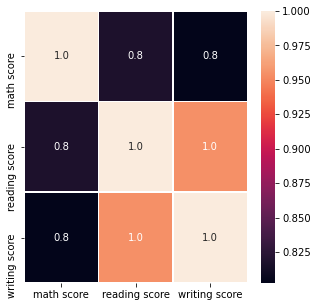

In [68]:
f, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(data.corr(), annot=True, linewidth = 0.5, fmt=".1f", ax=ax)

plt.show()

##### 3.1 Line Plot

- We use "sample()" to select 20 random rows from the data and random_state to select the rows in the same order.

In [69]:
data_random = data.sample(20,random_state=42)

data_random.index = np.arange(0,len(data_random))

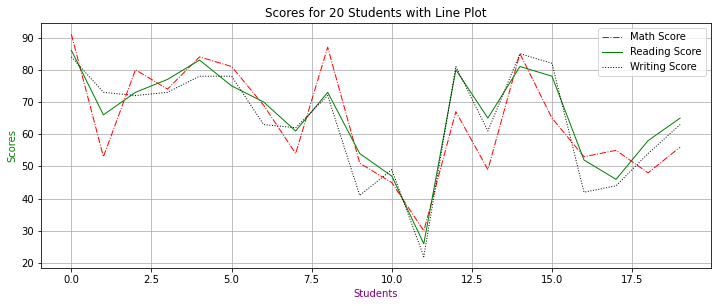

In [70]:
data1 = data_random

data1["math score"].plot(figsize=(12, 4.5), kind="line", color="red", label="Math Score", linewidth = 1, alpha=1, grid=True, linestyle='-.')

data1["reading score"].plot(kind="line", color="green", label="Reading Score", linewidth=1, alpha=1, grid=True, linestyle="-")

data1["writing score"].plot(kind="line", color="black", label="Writing Score", linewidth=1, alpha=1, grid=True, linestyle=":")

plt.legend(loc="upper right")

plt.xlabel('Students', FontSize = 10, color = "purple")

plt.ylabel("Scores", FontSize = 10, color = "green")

plt.title("Scores for 20 Students with Line Plot", FontSize = 12)

plt.savefig("Graphic.png")

plt.show()

##### 3.2 Scatter Plot

- Here we will look correlation between genders and their mathematic scores.
- We create a new dataframe and make females 1, males 0 then to plot on scatter we make gender column's type integer.

In [71]:
data2 = data.copy()

data2.gender = ["1" if each == "female" else "0" for each in data2.gender]

data2.gender = data2["gender"].astype(int)

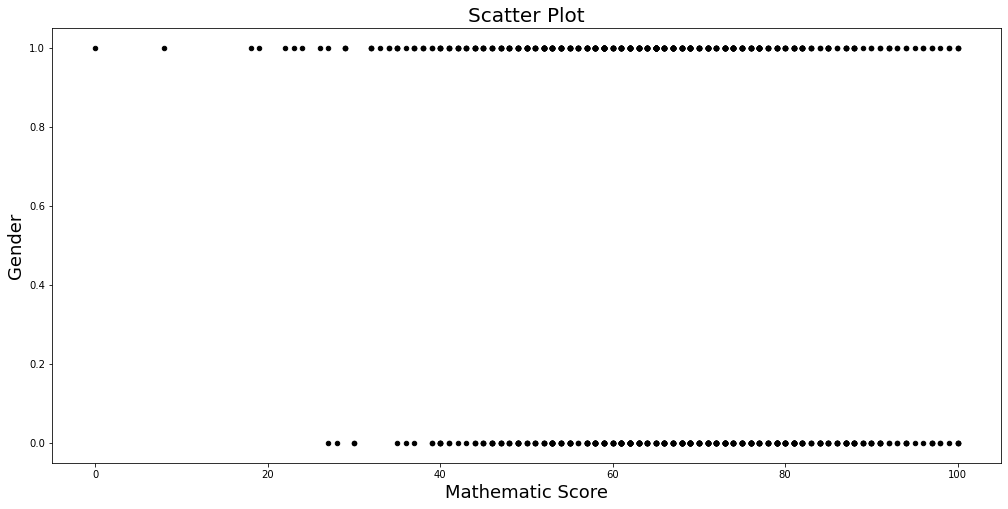

In [72]:
data2.plot(kind='scatter', x="math score", y="gender", color="black", figsize=(17, 8))

plt.xlabel("Mathematic Score", FontSize = 18)

plt.ylabel("Gender", FontSize = 18)

plt.title("Scatter Plot", FontSize = 20)

plt.show()

##### 3.3 Count Plot

- The visualization above, we have changed gender to integer type. So for this visualization we make integer values to F and M first.

In [73]:
data2.gender = ["F" if each == 1 else "M" for each in data2.gender]

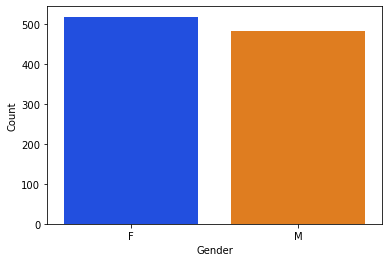

In [74]:
p = sns.countplot(x='gender', data = data2, palette='bright')

_ = plt.setp(p.get_xticklabels(), rotation = 0)

plt.xlabel("Gender")

plt.ylabel("Count")

plt.show()

In [75]:
# total score

data["total_score"] = (data["math score"] + data["reading score"] + data["writing score"]) / 3

In [76]:
# Dividing marks in grades

def Degree(mark):
    
    if mark >= 90:
        
        return "AA"

    elif 90 > mark >= 85:

        return "BA"
    
    elif 85 > mark >= 80:
        
        return "BB"
    
    elif 80 > mark >=75:
        
        return "CB"
    
    elif 75 > mark >= 65:
        
        return "CC"
    
    elif 65 > mark >= 55:
        
        return "DC"
    
    elif 55 > mark >= 45:
        
        return "DD"
    
    elif 45 > mark >= 35:
        
        return "ED"
    
    else:
        
        return "FF"
    

data["Mark_Degree"] = data.apply(lambda x: Degree(x["total_score"]), axis=1)

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Mark_Degree
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,CC
1,female,group C,some college,standard,completed,69,90,88,82.333333,BB
2,female,group B,master's degree,standard,none,90,95,93,92.666667,AA
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,DD
4,male,group C,some college,standard,none,76,78,75,76.333333,CB


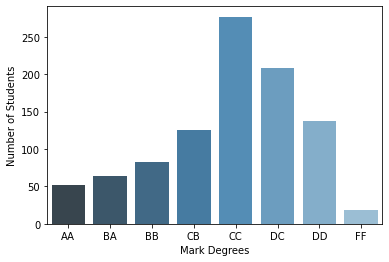

In [77]:
# Visulizing Grades in Graph

p = sns.countplot(x='Mark_Degree',data = data,order=['AA','BA','BB','CB','CC','DC','DD','FF'],palette="Blues_d")

plt.setp(p.get_xticklabels(), rotation=0) 

plt.xlabel("Mark Degrees")

plt.ylabel("Number of Students")

plt.show()

##### 3.4 Count Plot & Melting The Data

- In this visualization we will use "melt()" method to make an example of tidying data and to look it broadly. Maybe this method makes us analyse the data easier.

In [78]:
data_melt = data

melting = pd.melt(frame = data_melt,id_vars= ["gender","lunch"],value_vars =["math score","reading score","writing score"])

melting.drop("lunch",axis=1,inplace=True)

melting.rename(index=str,columns={"variable":"ScoreTable","value":"Values","gender":"Gender"},inplace=True)

melting.Gender = ["F" if each == "female" else "M" for each in melting.Gender]

melting.head()

,Gender,ScoreTable,Values
0,F,math score,72
1,F,math score,69
2,F,math score,90
3,M,math score,47
4,M,math score,76


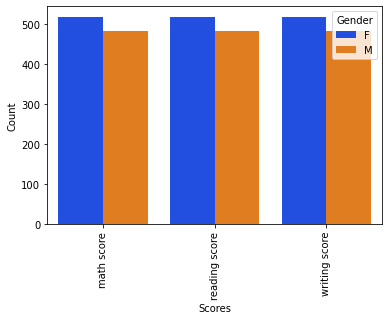

In [79]:
p = sns.countplot(x='ScoreTable', data = melting,hue="Gender" ,palette='bright')

_ = plt.setp(p.get_xticklabels(), rotation=90) 

plt.xlabel("Scores")

plt.ylabel("Count")

plt.show()

##### 3.5Histogram Plot

- In this visualization we will look for frequencies of math, reading and writing scores.

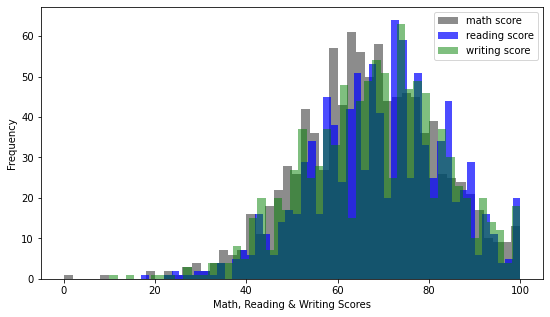

In [80]:
data2["math score"].plot(kind = 'hist',bins = 50,figsize = (9,5),alpha=0.9,color="gray")

data2["reading score"].plot(kind = 'hist',bins = 50,alpha=0.7,color="blue")

data2["writing score"].plot(kind = 'hist',bins = 50,alpha=0.5,color="green")

plt.xlabel("Math, Reading & Writing Scores")

plt.legend()

plt.show()

##### 3.6 Strip Plot

In [81]:
data["Total_Score"] = data["math score"]/3 + data["writing score"]/3 + data["reading score"]/3

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Mark_Degree,Total_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,CC,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333,BB,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667,AA,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,DD,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333,CB,76.333333


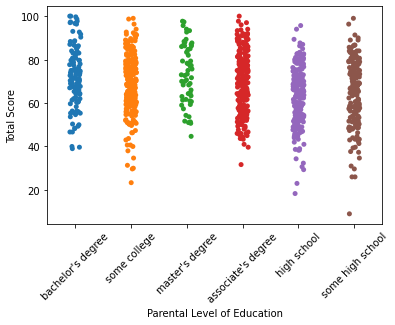

In [82]:
sns.stripplot(x="parental level of education",y='Total_Score',data=data)

plt.xticks(rotation=45)

plt.xlabel("Parental Level of Education")

plt.ylabel("Total Score")

plt.show()

##### 3.7 Factor Plot

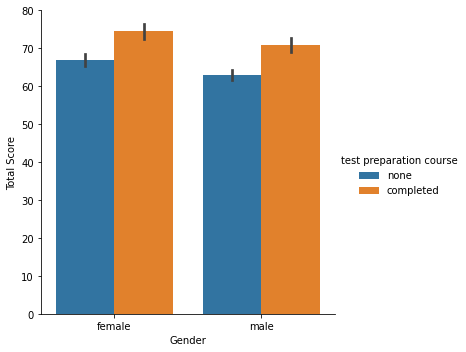

In [83]:
sns.factorplot(x='gender', y='Total_Score', hue='test preparation course', data=data, kind='bar')

plt.xlabel("Gender")

plt.ylabel("Total Score")

plt.show()

#### Phase 4: Conclusion

- In this dataset we looked at students' exam results, we compared math, writing and reading scores.

- We made some visualizations using matplot and seaborn libraries and we used some of the data analyzing methods.
